## *Netfilx: Analysis*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# loading dataset
netflix = pd.read_csv(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\instruction\netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


From the preview above, we can note that:
   - some of the column contains null
   - We have to change the format of date
   - Seperate the duration so we have numbres only

In [5]:
# Subscriber and renenue info
sub1 = pd.read_excel(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\Book1.xlsx', sheet_name='Sheet1')
sub2 = pd.read_excel(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\Book1.xlsx', sheet_name='Sheet2')
sub2

,sub,mil
0,2011,21.50
1,2012,25.71
2,2013,35.63
3,2014,47.99
4,2015,62.71
5,2016,79.90
6,2017,99.04
7,2018,124.35
8,2019,151.56
9,2020,192.95


In [3]:
# check for null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Analysis

In [5]:
# Total Film
netflix.show_id.count()

8807

In [6]:
# Percentage of movie
movi = netflix.loc[netflix['type'] == 'Movie'].type.count()
movi = (movi / 8807) * 100
print(f'{np.round(movi,1)}%')

69.6%


In [7]:
# Percentage of tv show
tv = netflix.loc[netflix['type'] == 'TV Show'].type.count()
tv = (tv / 8807) * 100
print(f'{np.round(tv,1)}%')

30.4%


In [8]:
netflix.duration.fillna(value='none', inplace=True)

In [9]:
# Average duration of movie (min)
import re
netflix.duration.fillna(value='none')
avgmov = netflix.loc[netflix.duration.str.contains('min')]
avgmov = avgmov['duration'].str.split(' ',expand=True) 
avgmov[0] = avgmov[0].astype(int)
np.round(avgmov[0].mean(),2)

99.58

In [10]:
# avrage duration of tv show (season)
avgtv = netflix.loc[netflix.duration.str.contains('Season')]
avgtv = avgtv['duration'].str.split(' ',expand=True) 
avgtv[0] = avgtv[0].astype(int)
np.round(avgtv[0].mean(),2)

1.76

**Below, we want to plot a bi-ddrectional bar chart to show difference in 'Movie' and 'Tv show' by rating**
- first we get the appropriate data by reducing the rows and column

In [24]:
data1 = netflix.loc[netflix['type'] == 'Movie']
data2 = netflix.loc[netflix['type'] == 'TV Show']
data1 = pd.DataFrame(data1['rating'].copy())
data1['Movie'] = 2
data1 = pd.DataFrame(data1.groupby('rating').count()).sort_values('Movie', ascending=False)

data2 = pd.DataFrame(data2['rating'].copy())
data2['Tv show'] = 2
data2 = pd.DataFrame(data2.groupby('rating').count()).sort_values('Tv show', ascending=False)
data1['Tv show'] = data2['Tv show'].astype(float)
data1['Movie'] = data1['Movie'].astype(float)
data1

,Movie,Tv show
rating,,
TV-MA,2062.0,1145.0
TV-14,1427.0,733.0
R,797.0,2.0
TV-PG,540.0,323.0
PG-13,490.0,NaN
PG,287.0,NaN
TV-Y7,139.0,195.0
TV-Y,131.0,176.0
TV-G,126.0,94.0


In [28]:
data1['Tv show'].fillna(value=0, inplace=True)
data1 = data1[:14]
data1

,Movie,Tv show
rating,,
TV-MA,2062.0,1145.0
TV-14,1427.0,733.0
R,797.0,2.0
TV-PG,540.0,323.0
PG-13,490.0,0.0
PG,287.0,0.0
TV-Y7,139.0,195.0
TV-Y,131.0,176.0
TV-G,126.0,94.0


**Now we have an appropriate data to plot our bi-derectional barchart**

In [29]:
title0 = 'Movie'
title1 = 'TV show'
hfont = {'fontname': 'calibri'}

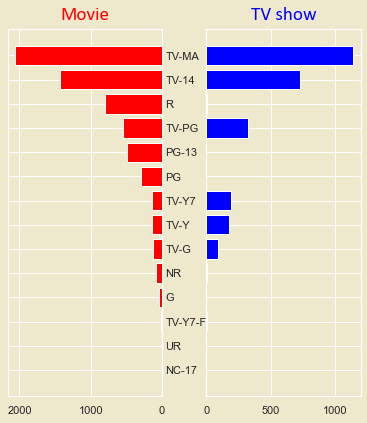

In [30]:
fig, axes = plt.subplots(figsize=(7,6), facecolor='#eee8cd', ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(data1.index, data1['Movie'], align='center', color='red', zorder=12)
axes[0].set_title(title0, fontsize=19, pad=9, color='red', **hfont)
axes[1].barh(data1.index, data1['Tv show'], align='center', color='blue', zorder=12)
axes[1].set_title(title1, fontsize=19, pad=9, color='blue', **hfont)
axes[0].invert_xaxis()
axes[0].set_facecolor('#eee8cd')
axes[1].set_facecolor('#eee8cd')
plt.gca().invert_yaxis()
axes[0].yaxis.tick_right()
axes[0].yaxis.set_tick_params(length=0)
plt.subplots_adjust(wspace=0.29, top=0.95, bottom=0.1, left=0.1, right=0.8)
filename = 'mpl-bidir'
plt.savefig(filename+'.png', facecolor='#eee8cd')

**insight**
- From the above, we note that type 'Movie' has more rating than 'Tv show'
- 'Tv Ma' are more popular rating among both movie and Tv show

**Now lets explor number of movie added by month.**

In [36]:
by month
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['month'] = netflix['date_added'].dt.month
df_month = pd.DataFrame(netflix.month.value_counts()).reset_index().rename(columns={'index': 'month', 'month': 'count'})
df_month['mnth'] = df_month['month'].replace({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_month

,month,count,mnth
0,7.0,827,july
1,12.0,813,dec
2,9.0,770,sep
3,4.0,764,april
4,10.0,760,oct
5,8.0,755,aug
6,3.0,742,march
7,1.0,738,jan
8,6.0,728,june
9,11.0,705,nov


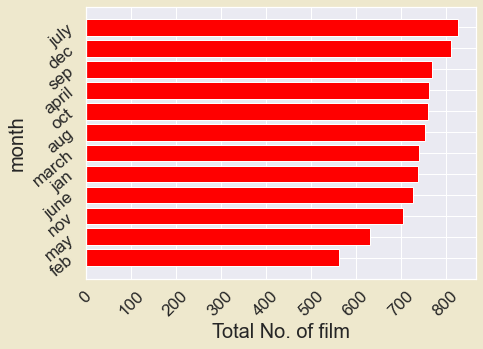

In [68]:
# plt.rcParams['figure.figsize'] = [8,6]
fig = plt.figure(figsize=(7,5), facecolor='#eee8cd')
plt.xlabel('Total No. of film', size=20)
plt.ylabel('month', size=20)
x = plt.barh(df_month['mnth'],df_month['count'], color='red')
plt.xticks(rotation=45, size=17)
plt.yticks(rotation=40, size=17)
plt.gca().invert_yaxis()
filename = 'mpl-bar'
plt.savefig(filename+'.png', facecolor='#eee8cd')
plt.show()

**Using the Subcriber and revenue data to check trends**

In [175]:
sub2[11:12]

,sub,mil
11,2022,221.0


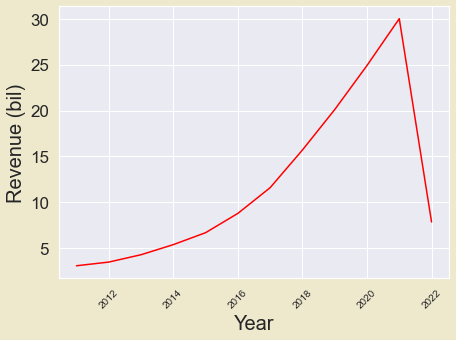

In [66]:
fig = plt.figure(figsize=(7,5), facecolor='#eee8cd')
plt.xlabel('Year', size=20)
plt.ylabel('Revenue (bil)', size=20)
x = plt.plot(sub1['revenue'],sub1['bil'], color='red')
plt.xticks(rotation=45, size=10)
plt.yticks(size=17)
filename = 'mpl-line'
plt.savefig(filename+'.png', facecolor='#eee8cd')
plt.show()

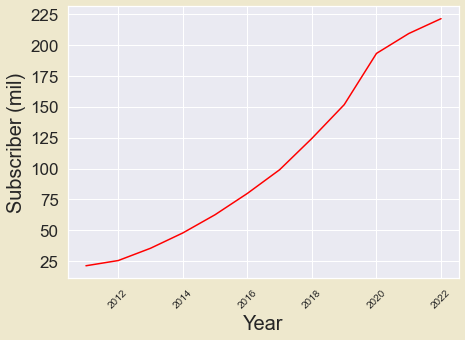

In [65]:
fig = plt.figure(figsize=(7,5), facecolor='#eee8cd')
plt.xlabel('Year', size=20)
plt.ylabel('Subscriber (mil)', size=20)
x = plt.plot(sub2['sub'],sub2['mil'] , color='red')
plt.xticks(rotation=45, size=10)
plt.yticks(size=17)
filename = 'mpl-line2'
plt.savefig(filename+'.png', facecolor='#eee8cd')
plt.show()

**Finally: Joining whole analysis togethher to get a preview**

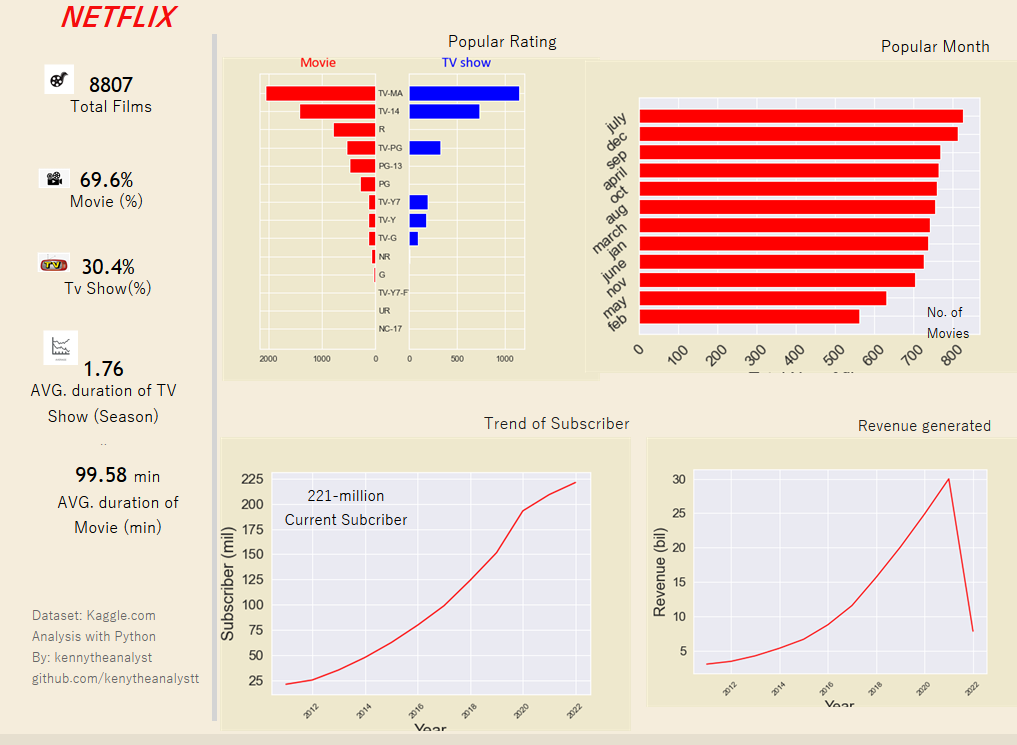